In [1]:
import numpy as np
import scipy as sp
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [ ]:
# this requires clean.mplstyle
plt.style.use('clean')

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Tools

In [121]:
def plot(f, x0, x1, N=100, ax=None, zero=True, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    x = np.linspace(x0, x1, N)
    y = f(x)
    ax.plot(x, y, **kwargs)
    if zero:
        ax.hlines(0, *ax.get_xlim(), color='k', linestyle='--', linewidth=1, zorder=-1)

In [138]:
def analyze_solve(solver, func, state, xlim, K=100, eps=1e-8, ax=None):
    hist = [state]
    conv = False

    for i in range(K):
        state = solver(func, state)
        value = func(np.array(state))
        hist.append(state)
        if np.abs(value).max() <= eps:
            conv = True
            break

    hist = np.atleast_2d(np.array(hist).T)
    hist_value = func(hist)

    if ax is None:
        _, ax = plt.subplots()
    plot(func, *xlim, ax=ax, c='k')
    for x, y in zip(hist, hist_value):
        ax.scatter(x, y, zorder=10)

    return i, state, value

### Test Functions

In [123]:
xlim = -2, 2

In [124]:
def linear(x):
    return x

In [125]:
def nonlinear(x):
    return x**3 - x - 1

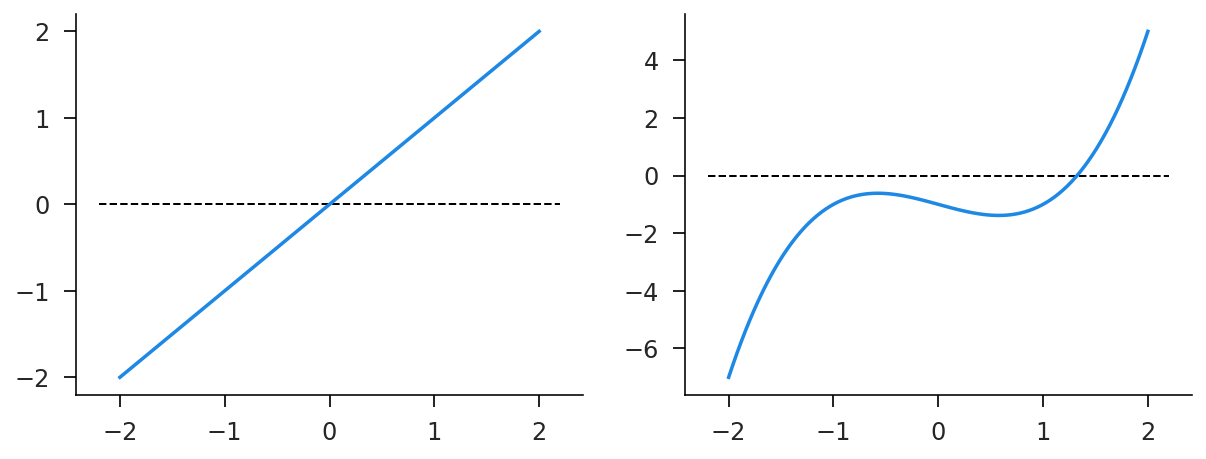

In [126]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 3.5))
plot(linear, *xlim, ax=axs[0])
plot(nonlinear, *xlim, ax=axs[1])

### Solving Methods

Here we just define the function that updates from one iteration to the next.

In [127]:
def bisect(f, ab):
    a, b = ab
    c = 0.5*(a+b)
    fa, fb, fc = f(a), f(b), f(c)
    if fa*fc <= 0:
        b = c
    else:
        a = c
    return a, b

In [128]:
def secant(f, ab):
    a, b = ab
    fa, fb = f(a), f(b)
    m = (fb-fa)/(b-a)
    c = b - fb/m
    fc = f(c)
    return b, c

In [129]:
def newton(f, x, ϵ=1e-8):
    xϵ = x + ϵ
    fx, fϵ = f(x), f(xϵ)
    fp = (fϵ-fx)/ϵ
    xp = x - fx/fp
    return xp

These are all run with initial states the converge!

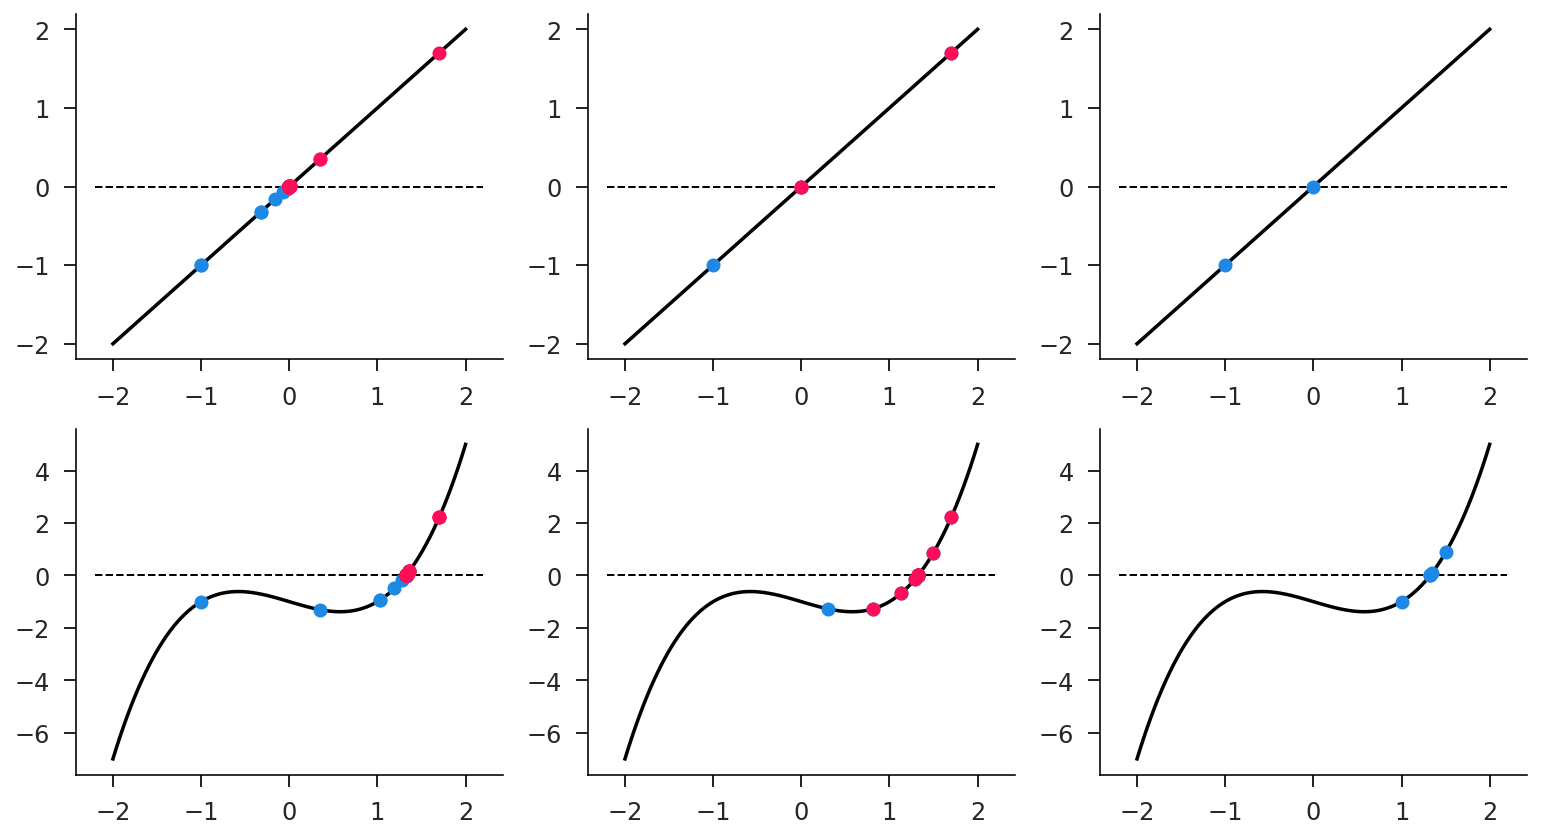

In [136]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(13, 7))
analyze_solve(bisect, linear, (-1, 1.7), xlim, ax=axs[0][0])
analyze_solve(secant, linear, (-1, 1.7), xlim, ax=axs[0][1])
analyze_solve(newton, linear, -1, xlim, ax=axs[0][2])
analyze_solve(bisect, nonlinear, (-1, 1.7), xlim, ax=axs[1][0])
analyze_solve(secant, nonlinear, (0.3, 1.7), xlim, ax=axs[1][1])
analyze_solve(newton, nonlinear, 1, xlim, ax=axs[1][2]);

For certain initial states, `secant` and `newton` go for some wild rides, but they usually seem to converge.

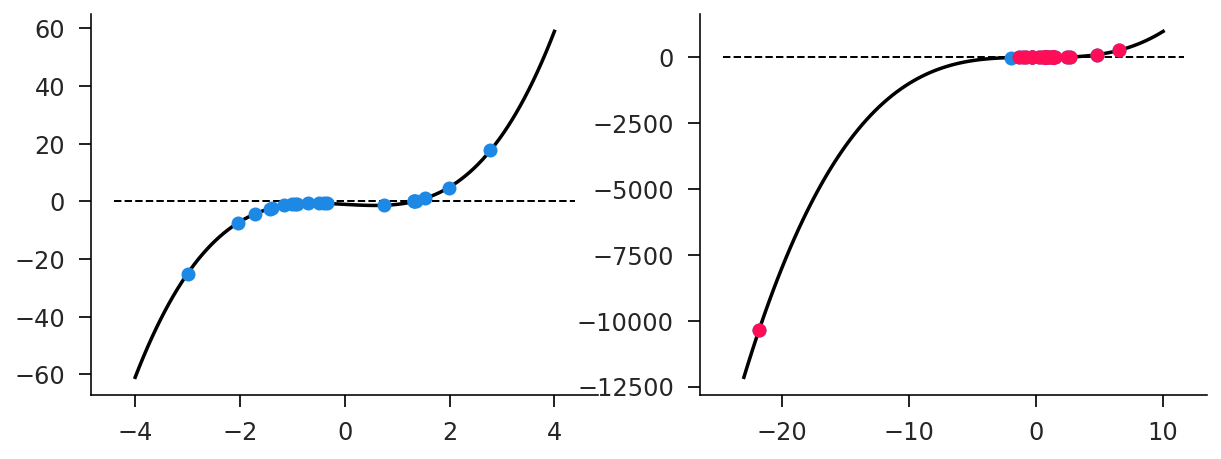

In [163]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 3.5))
analyze_solve(newton, nonlinear, -1, (-4, 4), ax=axs[0])
analyze_solve(secant, nonlinear, (-2, -1), (-23, 10), ax=axs[1]);

### Multivariate Methods

I'm going to use the builtin `scipy` methods here, rather than rolling my own.

### Optimization Methods